In [13]:
! git clone https://github.com/ucfilho/ANN

Cloning into 'ANN'...
remote: Counting objects: 29, done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 7), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [14]:
% cd ANN


/root/ANN/ANN/ANN


In [15]:
! ls


ann_aula_ago_14_2018_leitura_git.ipynb	Hydrofoil_ago_29_2018.csv
ANN_Hydrofoil_ago_29_2018.txt.ipynb	john_mccarthy.png
arvore.jpg				Paper_Carvao_China_abril_12_2016.csv
BBC_007041008.wav			Paper_Carvao_China_mar_31_2016.txt
Criando_Gethub_Ver_Youtube.txt		README.md
FAULT_DIAGNOSIS_maio_25_2017.txt


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wave
import cv2


In [0]:
%matplotlib inline

In [0]:
import IPython.display as ipd

In [24]:
fname= 'BBC_007041008.wav'
ipd.Audio(fname)

In [30]:
wav= wave.open(fname)
print("taxa de amostragem=", wav.getframerate()) #é a qualidade do som quanto maior melhor a qualidade, o 22050 é qualidade de fita
print("total frames=", wav.getnframes()) #tipo frequencia
print("tempo=", wav.getnframes()/wav.getframerate())

taxa de amostragem= 22050
total frames= 5617458
tempo= 254.76


In [34]:
from scipy.io import wavfile
rate, data = wavfile.read(fname) #som estéreo oscila entre os dois ouvidos
print(data)

[[ 0  0]
 [-1 -1]
 [ 0  0]
 ...
 [-1  0]
 [ 0  0]
 [ 0 -1]]


Text(0.5,0,'duração')

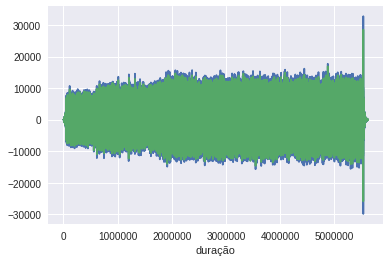

In [39]:
plt.plot(data,'-',) #x é o tempo expresso em frames e o eixo y quantos hertz
plt.xlabel('duração') #coloca as legendas

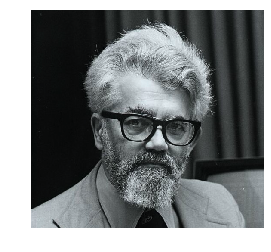

In [43]:
img= cv2.imread("john_mccarthy.png")
plt.axis("off") #para retirar as linhas da foto
plt.imshow(img)
plt.show()

In [53]:
img= cv2.imread("john_mccarthy.png",0) #carregar imagem preto e branco. Se vc tirar o zero, a figura fica colorida em combinacao de 2 cores RBG (red, blue,green)
img2= cv2.resize(img,(10,10)) #o zero é o preto e o 255 é o branco. 2^8 sao 8 bites de cor. 
for i in img2:
  print(i)             

[15 12 16 41 49 60 21 32 23 36]
[ 14  12  15  74 197 210 181  47  25  23]
[ 13  10   0 184 133 195 153 135  33  14]
[ 12  10 133 166 211 192  76 194  55  14]
[ 10  10  14  70 183 208 153 138  63  21]
[ 11   9   5  94  77 175  36  66  65  27]
[ 10  10  10 120 101  20  89  69  68  35]
[ 11  13  90  50 113  72 110  12  82 143]
[ 11 171 133  96 163 150 114 167 188 125]
[198 168 130  95  52  10  99 149 178 117]


In [0]:
#######-------------------------------------------------------------ACABOU--ARTIGO QUE O BIRA TROUXE DE CATAMARAM-------------------------------------------------

In [0]:
# import os #importar o sist operacional se vc estiver no seu computador
#os.chdir('coloca o caminho onde está o seu arquivo')

In [67]:
Dat=pd.read_csv('Hydrofoil_ago_29_2018.csv')
print(Dat.head())

   Unnamed: 0  Case  Hydrofoil    Froude  Resistence   Sinkage      Trim  \
0           1     1          1  0.000000    0.000000  0.000000  0.000000   
1           2     2          1  0.103733    2.549729 -0.689028  1.353022   
2           3     3          1  0.124480    3.628461 -0.835413  1.346323   
3           4     4          1  0.165973    6.374322 -1.864337  1.361538   
4           5     5          1  0.186719    8.217973 -2.301539  1.378858   

      Power  
0  0.000000  
1  0.950991  
2  1.624000  
3  3.803965  
4  5.517212  


In [68]:
dat=[]
dat=Dat.iloc[:,[2,3,4,5,6,7]].copy() #escolher as colunas que vamos utilizar
print(dat.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [0]:
def normalize(M): #definir a funcao que vai normalizar meus dados
  Num=len(M.columns) #tamanho
  for i in range(Num):
    Max=float(np.max(M.iloc[:,[i]]))
    Min=float(np.min(M.iloc[:,[i]]))
    M.iloc[:,[i]]=M.iloc[:,[i]].apply(lambda x:0.8*(x-Min)/(Max-Min)+0.1) #normalizou entre 0.1 e 0.9 os dados da tabela
  return M

In [73]:
dat=normalize(dat)
print(dat.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0        0.1  0.100000    0.100000  0.146766  0.100000  0.100000
1        0.1  0.134572    0.105417  0.141809  0.316207  0.100234
2        0.1  0.141487    0.107708  0.140756  0.315137  0.100400
3        0.1  0.155315    0.113542  0.133353  0.317568  0.100936
4        0.1  0.162230    0.117458  0.130207  0.320336  0.101358


In [0]:
index= [2,3,4,5]

In [77]:
y=[]
y=dat.iloc[:,index].copy() #está armazenando os dados em y das 4 ultimas colunas, que sao as saidas
print(y.head())

   Resistence   Sinkage      Trim     Power
0    0.100000  0.146766  0.100000  0.100000
1    0.105417  0.141809  0.316207  0.100234
2    0.107708  0.140756  0.315137  0.100400
3    0.113542  0.133353  0.317568  0.100936
4    0.117458  0.130207  0.320336  0.101358


In [79]:
x=[]
x=dat.iloc[:,[0,1]].copy() #está armazenando os dados em x das 2 primeiras colunas, que sao as entradas
print(x.head())

   Hydrofoil    Froude
0        0.1  0.100000
1        0.1  0.134572
2        0.1  0.141487
3        0.1  0.155315
4        0.1  0.162230


In [0]:
#fazer a rede neural 2 camadas ocultas uma com 9 e a outra com 8. a rede trabalhou com tg hiperbolica tanh. ele utiliza o solver lbfgs-newtonrapson e diz que é melhor que o adem e sgl

In [0]:
from sklearn.neural_network import MLPRegressor

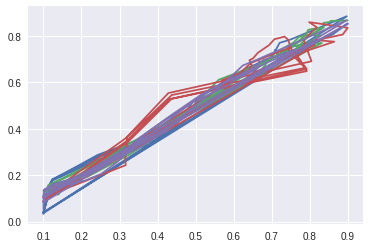

In [87]:
clf= MLPRegressor(solver='lbfgs', activation='tanh', alpha= 1e-5, hidden_layer_sizes=(9,8), random_state=1) #alpha é a taxa de aprendizagem
clf.fit(x,y) #treinamento da rede
w=clf.predict(x) #armazenar os resultados da rede em w. e y sao os dados do artigo. tinha que ter separado os dados: uma parte usar na rede, predict, e outra parte treinar, fit 
plt.plot(y,w)
plt.show()